In [9]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [3]:
# 1. Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target labels

In [4]:
# 2. Split the Data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [5]:
# 3. Baseline Model (No PCA)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model (baseline without PCA)
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# Evaluate the baseline model
y_pred_baseline = baseline_model.predict(X_test_scaled)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='macro')
recall_baseline = recall_score(y_test, y_pred_baseline, average='macro')

print("Baseline Model (No PCA) Performance:")
print(f"Accuracy: {accuracy_baseline:.4f}, Precision: {precision_baseline:.4f}, Recall: {recall_baseline:.4f}\n")

Baseline Model (No PCA) Performance:
Accuracy: 0.9815, Precision: 0.9825, Recall: 0.9841



In [6]:
# 4. Apply PCA: Reduce the dataset to different numbers of principal components
components_list = [2, 5, 10]
accuracy_pca = []
precision_pca = []
recall_pca = []

for n_components in components_list:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # 5. Train and Evaluate with PCA
    model_pca = LogisticRegression(max_iter=1000, random_state=42)
    model_pca.fit(X_train_pca, y_train)

    # Make predictions
    y_pred_pca = model_pca.predict(X_test_pca)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred_pca)
    precision = precision_score(y_test, y_pred_pca, average='macro')
    recall = recall_score(y_test, y_pred_pca, average='macro')

    accuracy_pca.append(accuracy)
    precision_pca.append(precision)
    recall_pca.append(recall)

    print(f"PCA with {n_components} Components - Performance:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}\n")

PCA with 2 Components - Performance:
Accuracy: 0.9444, Precision: 0.9501, Recall: 0.9471

PCA with 5 Components - Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000

PCA with 10 Components - Performance:
Accuracy: 0.9815, Precision: 0.9825, Recall: 0.9841



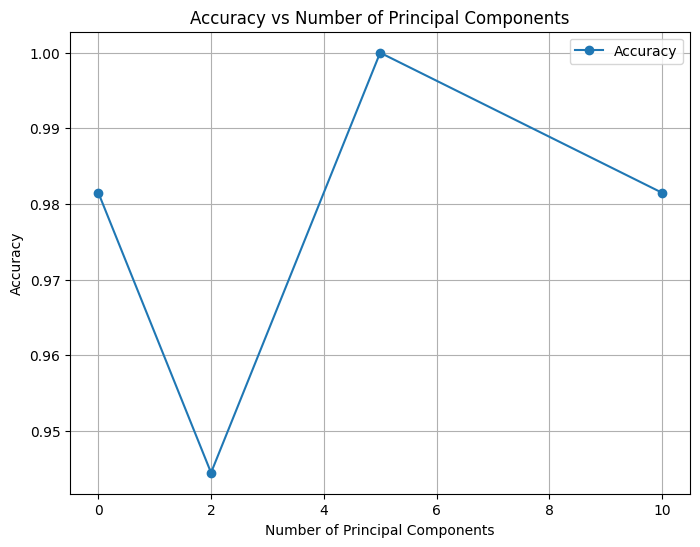

In [8]:

# 6. Visualization: Plot accuracy vs number of components
plt.figure(figsize=(8, 6))
plt.plot([0] + components_list, [accuracy_baseline] + accuracy_pca, marker='o', label='Accuracy')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Principal Components')
plt.grid(True)
plt.legend()
plt.show()

